MALIGNANT COMMENTS CLASSIFICATION

Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 
Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
    
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


In [86]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [63]:
# Reading csv file
train = pd.read_csv(r"C:\Users\sanka\Downloads\Compressed\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [64]:
# Reading csv file
test = pd.read_csv(r"C:\Users\sanka\Downloads\Compressed\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [65]:
test.shape

(153164, 2)

In [66]:
train.shape

(159571, 8)

Here we are provided with train and test datasets. Both the datatset provides information about the online malignant comments. Here we can notice first 5 and last 5 rows of the dataset. The training dataset contains 159571 rows and 8 columns and test dataset contains 153164 rows and 2 columns.

The train dataset is comprised of both features and labels. In train dataset the label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment. Since the target variable is consists of 2 classes 0 and 1 which can be termed as categorical in nature which makes this to be a Classification Problem.
The test dataset contains only independent variables.

So, I will use train dataset for building our model and then will use the test dataset for getting prediction from the trained best model.

# Exploratory Data Analysis (EDA)

In [67]:
# Checking the no of columns in the train and test dataset
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [68]:
test.columns

Index(['id', 'comment_text'], dtype='object')

In [69]:
#checking for null values in both the dataset
train.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [70]:
test.isna().sum()

id              0
comment_text    0
dtype: int64

No null values are present in both the dataset so we dont need to use imputation techniques.

In [71]:
#now lets find out the no of datatypes in each dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


The train dataset contains 2 different types of data, integer and object. There are 2 columns with object datatype.

The test dataset contains only object data type. 

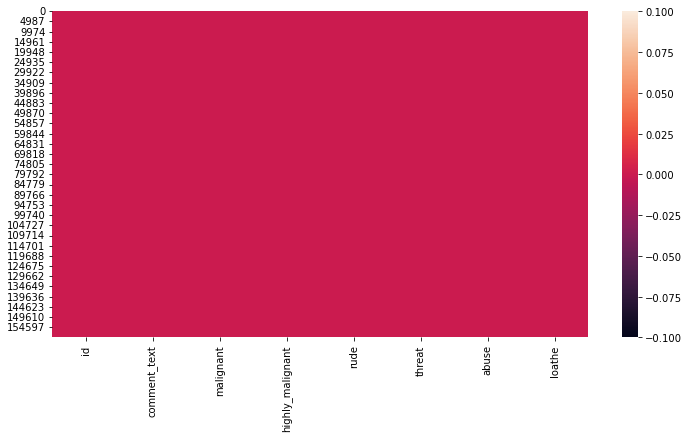

In [73]:
# Let's recheck whether null values are present in both the datasets
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull())
plt.show()

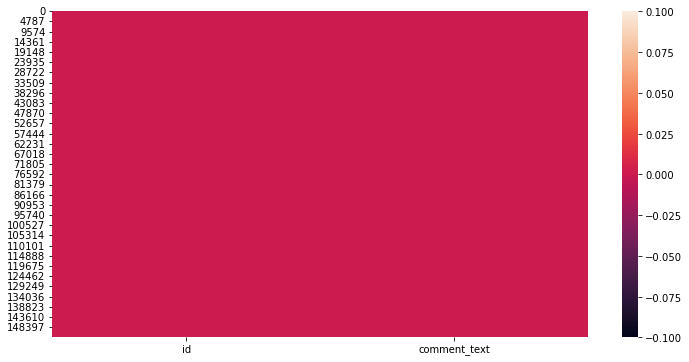

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(test.isnull())
plt.show()

In [75]:
#now lest check if any duplicate value is present in the dataset
train.duplicated().sum()

0

In [76]:
test.duplicated().sum()

0

In [77]:
# Checking the number of unique values in each column of both the datasets
train.nunique().to_frame(" Unique Values")

,Unique Values
id,159571
comment_text,159571
malignant,2
highly_malignant,2
rude,2
threat,2
abuse,2
loathe,2


In [78]:
test.nunique().to_frame(" Unique Values")

,Unique Values
id,153164
comment_text,153164


In [79]:
#lets drop the id column from both the datasets aas it is unique for every record
train=train.drop(["id"], axis=1)

In [80]:
test=test.drop(["id"], axis=1)

In [81]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in train.dtypes.index:
    if train.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in train.dtypes.index:
    if train.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['comment_text']

Numerical columns present in the dataset are:
 ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']


In [90]:
#printing the valuecounts for each feature

cols=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe',]
for col in cols:
    print("Value Counts of {} :".format(col, train[col].nunique()))
    print(train[f'{col}'].value_counts())
    print('*'*100)

Value Counts of malignant :
0    144277
1     15294
Name: malignant, dtype: int64
****************************************************************************************************
Value Counts of highly_malignant :
0    157976
1      1595
Name: highly_malignant, dtype: int64
****************************************************************************************************
Value Counts of rude :
0    151122
1      8449
Name: rude, dtype: int64
****************************************************************************************************
Value Counts of threat :
0    159093
1       478
Name: threat, dtype: int64
****************************************************************************************************
Value Counts of abuse :
0    151694
1      7877
Name: abuse, dtype: int64
****************************************************************************************************
Value Counts of loathe :
0    158166
1      1405
Name: loathe, dtype: int64
*******************

In [92]:
# Statistics of the train dataset
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above description we can observe that the counts of every column is same which means there are no missing values present in the dataset.

The minimum and maximum values of the features are same, they have 0 and 1 respectively.

The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset.

By summarizing the data we can say there are no outliers but the data is skewed to right in all the columns which means presence of skewness. Since we have only categorical columns there is no need to remove outliers or skewness.

In [93]:
#Checking percentage of good and bad comments from all features combiningly in dataset 
good_comments = train[(train['malignant']!=1) & (train['highly_malignant']!=1) & (train['rude']!=1) & 
                            (train['threat']!=1) & (train['abuse']!=1) & (train['loathe']!=1)]
percent=len(good_comments)/len(train)*100
print('Percentage of positive comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of positive comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


We can observe about 90% of the comments are positive and only 10% of the comments falls down into negative.

In [94]:
# Check percentage of comments that are toxic compared to normal comments
cols=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe',]
for col in cols:
    print("Percentage of toxic comments compared to normal comments in {} :".format(col, train[col].value_counts(normalize=True)*100))
    print(train[f'{col}'].value_counts(normalize=True)*100)
    print('*'*100)

Percentage of toxic comments compared to normal comments in malignant :
0    90.415552
1     9.584448
Name: malignant, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in highly_malignant :
0    99.000445
1     0.999555
Name: highly_malignant, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in rude :
0    94.705178
1     5.294822
Name: rude, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in threat :
0    99.700447
1     0.299553
Name: threat, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in ab

As we know 1 indicates the good or neutral comments and 0 indicates the negative comments. So, from the above we can infer that more than 90% of the comments in all the columns fall down into negative or bad and only few comments are considered to be good.

In [95]:
# Creating a new feature having negative and non negative comments for the particular comment.
cols = [ 'malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
train[cols].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [96]:
# Label column is the sum of all the target features
train['label'] = train[cols].sum(axis=1)
train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [97]:
train.label.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [98]:
# Scaling the label column that is converting it from multiple labels into binary
train['label'] = train['label'] >0
train['label'] = train['label'].astype(int)
train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [99]:
# Checking value counts for label after scaling
train.label.value_counts()


0    143346
1     16225
Name: label, dtype: int64

In [100]:
# Creating new column for length of comments
train['comment_length']=train.comment_text.str.len()
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [101]:
# Adding new column comment_length to check length of comment_text characters in test data
test['comment_length']=test.comment_text.str.len()
test

,comment_text,comment_length
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41
...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",60
153160,== Throw from out field to home plate. == \n\n...,198
153161,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,""" \n\n == """"One of the founding nations of the...",502


# Data Visualization


In [102]:
# Storing the number of counts for every target label
counts=train.iloc[:,1:].sum()
counts

malignant              15294
highly_malignant        1595
rude                    8449
threat                   478
abuse                   7877
loathe                  1405
label                  16225
comment_length      62893130
dtype: int64

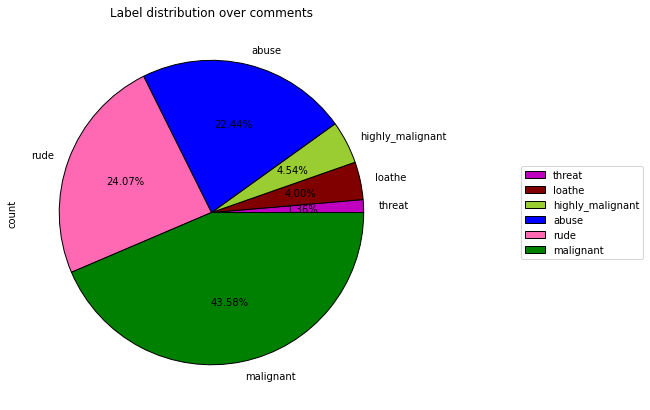

In [103]:
#  Label distribution comments using pie chart
labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
colors = ["m", "maroon","yellowgreen","blue","hotpink","g"]

x = train[labels].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
x.plot.pie(y = 'count', title = 'Label distribution over comments',autopct='%.2f%%', colors=colors,figsize = (7,7),
          wedgeprops = {'linewidth':1, 'edgecolor':'k'})\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

From the pie chart we can notice approximately 43% of the comments are malignant, 24% of the comments are rude and 22% are abuse. The count of malignant comments are high compared to other type of comments and the count of threat comments are very less.

0    143346
1     16225
Name: label, dtype: int64


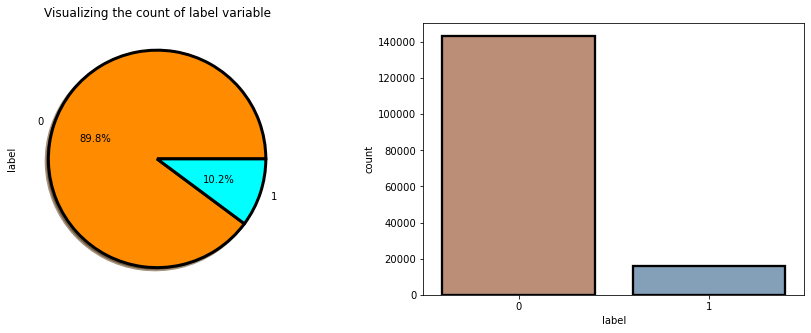

In [104]:
# Visualizing count of negative and non negative comments combining 
print(train['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["darkorange", "cyan"]
train['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':3, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of label variable')
ax = sns.countplot('label', data=train, ax=ax[1],palette="twilight_shifted_r",linewidth=2.3, edgecolor="k")
plt.show()

From the above plots we can observe the count of negative comments are high compared to the non negative comments. Here around 90% of the comments are turned out to be a negative comments and only 10% of them are considered to be positive or neutral comments. We can also observe the data imbalance issue here, we need to balance the data.

0    144277
1     15294
Name: malignant, dtype: int64


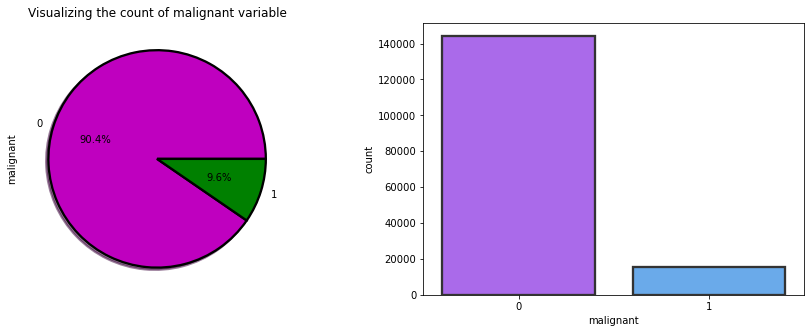

In [105]:
# Visualizing count of malignant and non malignant comments
print(train['malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["m", "green"]
train['malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors,
                                              wedgeprops = {'linewidth':2.3, 'edgecolor':'k'},
                                              title = 'Visualizing the count of malignant variable')
ax = sns.countplot('malignant', data=train, ax=ax[1],palette="cool_r",linewidth=2.3, edgecolor=".2")
plt.show()

From the above plots we can observe the count of malignant comments are high compared to non malignant comments. That is around 90% of the comments are malignant and only 9.6% of the comments are good.

0    157976
1      1595
Name: highly_malignant, dtype: int64


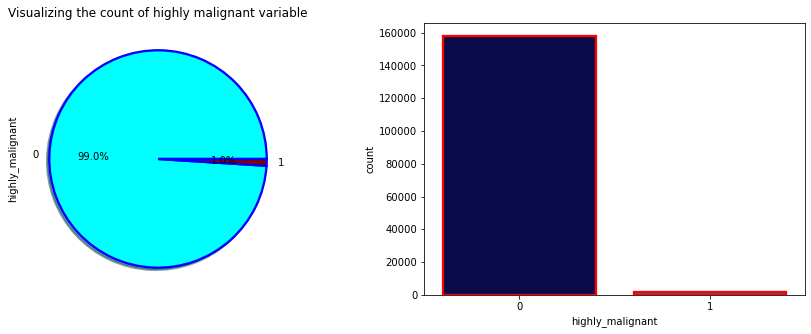

In [106]:
# Visualizing count of highly malignant and normal comments
print(train['highly_malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["cyan", "maroon"]
train['highly_malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2.3, 'edgecolor':'b'},
                                                     colors=colors,title = 'Visualizing the count of highly malignant variable')
ax = sns.countplot('highly_malignant', data=train, ax=ax[1],palette="ocean",linewidth=2.3, edgecolor="r")
plt.show()

From the plot we can observe the count of highly malignant comments are very high which is about 99% and only 1% of the comments are normal.

0    151122
1      8449
Name: rude, dtype: int64


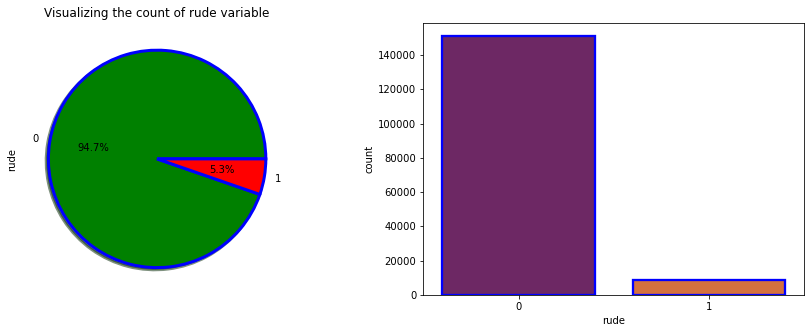

In [107]:
# Visualizing count of rude and normal comments
print(train['rude'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["g", "r"]
train['rude'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                         wedgeprops = {'linewidth':3, 'edgecolor':'b'},
                                                     colors=colors,title = 'Visualizing the count of rude variable')
ax = sns.countplot('rude', data=train, ax=ax[1],palette="inferno",linewidth=2.3, edgecolor="b")
plt.show()

The count of rude comments are high compared to normal comments. Around 94% of the comments are falls down into rude and remaining considered to be normal comments.

0    159093
1       478
Name: threat, dtype: int64


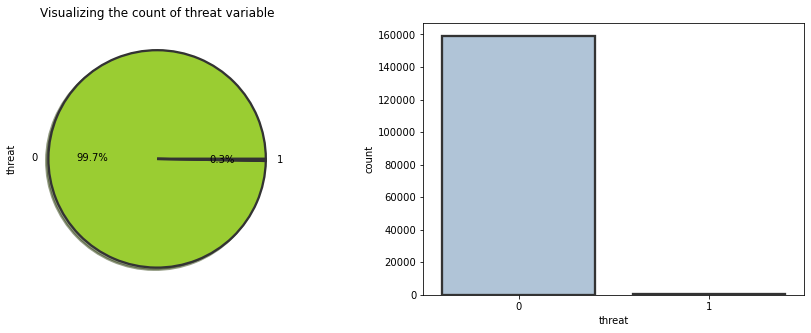

In [108]:
# Visualizing count of threat and normal comments
print(train['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["yellowgreen", "b"]
train['threat'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                           wedgeprops = {'linewidth':2.3, 'edgecolor':'.2'},
                                                     colors=colors,title = 'Visualizing the count of threat variable')
ax = sns.countplot('threat', data=train, ax=ax[1],palette="BuPu",linewidth=2.3, edgecolor=".2")
plt.show()

Here also 99.7% of the comments are threat and only 0.3% of the comments are look normal.

0    159093
1       478
Name: threat, dtype: int64


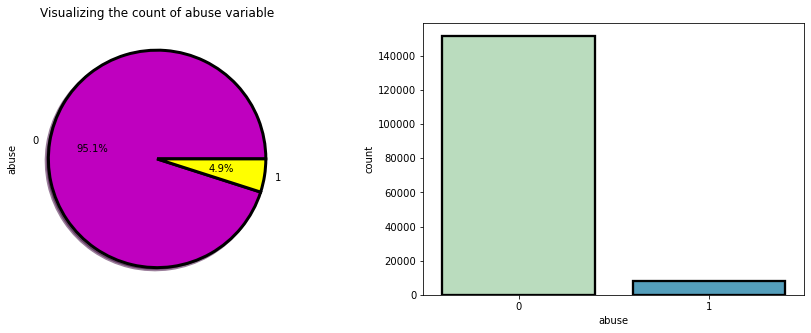

In [109]:
# Visualizing count of abuse and normal comments
print(train['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["m", "yellow"]
train['abuse'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':3, 'edgecolor':'k'}, colors=colors,
                                          title = 'Visualizing the count of abuse variable')
ax = sns.countplot('abuse', data=train, ax=ax[1],palette="GnBu",linewidth=2.3, edgecolor="k")
plt.show()

The count of abusing type comments are high which has 95.1% and only 4.9% of the comments are normal.

0    158166
1      1405
Name: loathe, dtype: int64


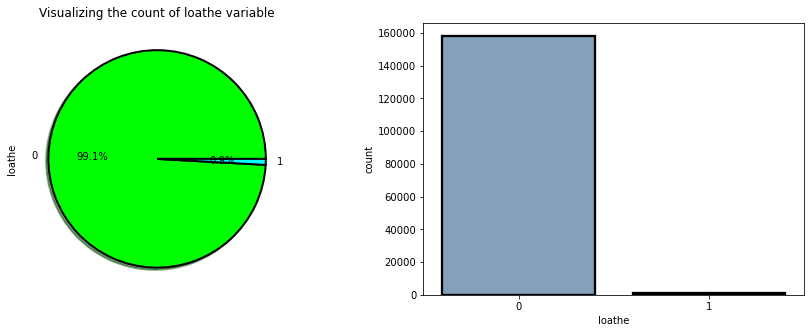

In [110]:
# Visualizing count of loathe and normal comments
print(train['loathe'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["lime", "cyan"]
train['loathe'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of loathe variable')
ax = sns.countplot('loathe', data=train, ax=ax[1],palette="twilight_shifted",linewidth=2.3, edgecolor="k")
plt.show()


The count of loathe is high compared to normal text comments.

In [112]:
train.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'label', 'comment_length'],
      dtype='object')

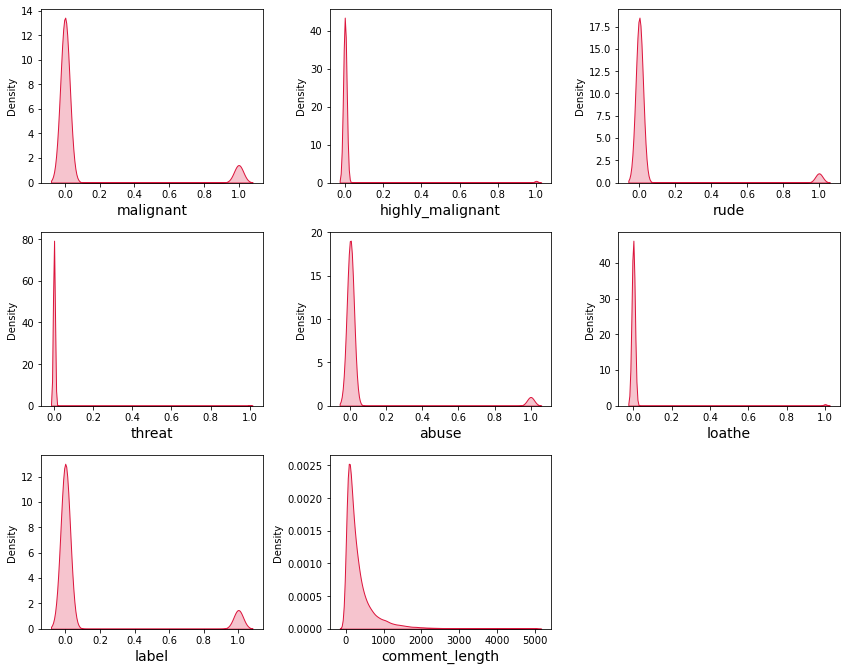

In [116]:
# now the data looks good and there is no missing values and Object values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in train.drop(['comment_text'],axis=1):
    if plotnumber<=8:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(train[column],color="crimson",hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

From the distribution plots we can notice that all the columns are skewned to right except comment_label column. Since all the columns are categorical in nature there is no need to remove skewness and outliers in any of the columns.

# Text Pre-Processing

Using the text preprocessing techniques we can remove noise from raw data and makes raw data more valuable for building models. Pre-processing involves the followinf steps, but these will be performed in a slightly different manner:

Removing Punctuations and other special characters
Splitting the comments into individual words
Removing Stop Words
Stemming and Lemmatising
Splitting dataset into Training and Testing

The string library contains punctuation characters. This is imported and all numbers are appended to this string. From the value count functions we have seen that our comment_text feature contains strings such as won't, didn't, etc which contain apostrophe character('). To prevent these words from being converted to wont/didnt, the character ' represented as \' in escape sequence notation is replaced by empty character in the punctuation string.

In [118]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [119]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

Converting all our text into the lower case is a simple and most effective approach. If we are not applying lower case conversion on words like NLP, nlp, Nlp, we are treating all these words as different words/tokens. It is better to perform lower case the text as the first step in this text preprocessing. Because if we are trying to remove stop words all words need to be in lower case.

In [120]:
# Replacing '\n' in comment_text
train['comment_text'] = train['comment_text'].replace('\n',' ')

In [121]:
# Convert all comment texts to lower case in train dataset
train['comment_text'] = train['comment_text'].str.lower()
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0,0,99
159568,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [122]:
# Replacing '\n' in comment_text
test['comment_text'] = test['comment_text'].replace('\n',' ')

# Convert all comment texts to lower case in test dataset
test['comment_text'] = test['comment_text'].str.lower()
test

,comment_text,comment_length
0,yo bitch ja rule is more succesful then you'll...,367
1,== from rfc == \n\n the title is fine as it is...,50
2,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,":if you have a look back at the source, the in...",205
4,i don't anonymously edit articles at all.,41
...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",60
153160,== throw from out field to home plate. == \n\n...,198
153161,""" \n\n == okinotorishima categories == \n\n i ...",423
153162,""" \n\n == """"one of the founding nations of the...",502


I have converted comments into lower case using the above coding in both train and test data.

Now I am going to clean the data by removing/replacing URLs, Numbers, punctuations, converting numbers to words etc. We can also observe special characters at the top of the common letter or characters if we press a longtime while typing, for example, résumé. If we are not removing these types of noise from the text, then the model will consider resume and résumé; both are two different words. So, I am replacing them as well. Also, removing extra white spaces is also important. We can not get any information from extra spaces, so that we can ignore all additional spaces such as 0ne or more newlines, tabs, extra spaces.

In [125]:
# Cleaning data in train dataset
# Replace email addresses with "email"
train["comment_text"] = train["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train["comment_text"]=train["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
train["comment_text"] = train["comment_text"].str.replace(r'£|\$','dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train["comment_text"] = train["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replace numbers with 'numbr'
train["comment_text"] = train["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Remove punctuation
train["comment_text"] = train["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train["comment_text"] = train["comment_text"].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train["comment_text"] = train["comment_text"].str.replace(r'^\s+|\s+?$', '')

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

train["comment_text"] = train["comment_text"].apply(lambda x:' '.join(term for term in x.split() 
                                                                            if term not in stop_words))
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [ ]:
# Cleaning data in test dataset
# Replace email addresses with "email"
test["comment_text"] = test["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
test["comment_text"] = test["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
test["comment_text"] = test["comment_text"].str.replace(r'£|\$','dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test["comment_text"] = test["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replace numbers with 'numbr'
test["comment_text"] = test["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Remove punctuation
test["comment_text"] = test["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
test["comment_text"] = test["comment_text"].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
test["comment_text"] = test["comment_text"].str.replace(r'^\s+|\s+?$', '')

In [ ]:
stp_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

test["comment_text"] = test["comment_text"].apply(lambda x:' '.join(term for term in x.split() 
                                                                            if term not in stp_words))
lemma=WordNetLemmatizer()
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(lemma.lemmatize(t) for t in x.split()))

We have successfully completed cleaning and pre-processing the data in both train and test datasets.

In [129]:
# New column (clean_length) after removing punctuations, stopwords in train dataset
train['clean_length'] = train.comment_text.str.len()
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,0,264,260
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,0,112,112
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,0,233,229
3,more i can t make any real suggestions on impr...,0,0,0,0,0,0,0,622,601
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0,67,63
...,...,...,...,...,...,...,...,...,...,...
159566,and for the second time of asking when your vi...,0,0,0,0,0,0,0,295,272
159567,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,0,99,94
159568,spitzer umm theres no actual article for prost...,0,0,0,0,0,0,0,81,73
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0,116,115


In [130]:
# New column (clean_length) after removing punctuations, stopwords in test dataset
test['clean_length'] = test.comment_text.str.len()
test

,comment_text,comment_length,clean_length
0,yo bitch ja rule is more succesful then you ll...,367,358
1,from rfc the title is fine as it is imo,50,39
2,sources zawe ashton on lapland,54,30
3,if you have a look back at the source the info...,205,200
4,i don t anonymously edit articles at all,41,40
...,...,...,...
153159,i totally agree this stuff is nothing but too ...,60,55
153160,throw from out field to home plate does it get...,198,182
153161,okinotorishima categories i see your changes a...,423,365
153162,one of the founding nations of the eu germany ...,502,460


I have created new column "clean_length" in both train and test dataset after cleaning the data. We can see that nearly half of the text has been removed from the comment_text after using required pre-processing



In [131]:
# Total length removal in train data
print('Original Length:',train.comment_length.sum())
print('Clean Length:',train.clean_length.sum())
print("Total Words Removed:", (train.comment_length.sum()) - (train.clean_length.sum()))

Original Length: 62893130
Clean Length: 60543209
Total Words Removed: 2349921


In [132]:

# Total length removal in test data
print('Original Length:',test.comment_length.sum())
print('Clean Length:',test.clean_length.sum())
print("Total Words Removed:", (test.comment_length.sum()) - (test.clean_length.sum()))

Original Length: 55885733
Clean Length: 52605432
Total Words Removed: 3280301


# Plotting WordCloud for each label

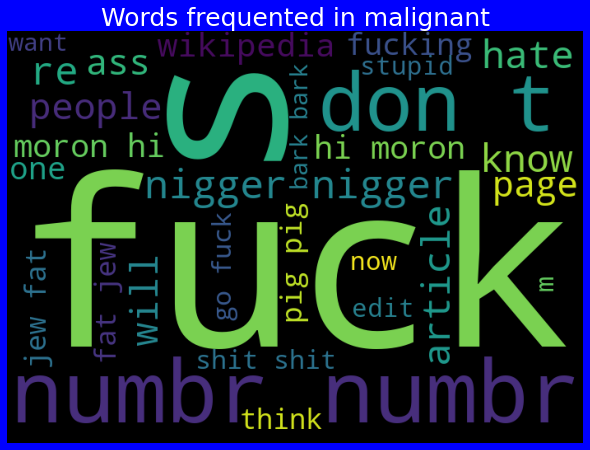

In [133]:
# Getting sense of loud words in malignant
from wordcloud import WordCloud

# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
malignants = train['comment_text'][train['malignant']==1]

malignant_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(malignants))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in malignant",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

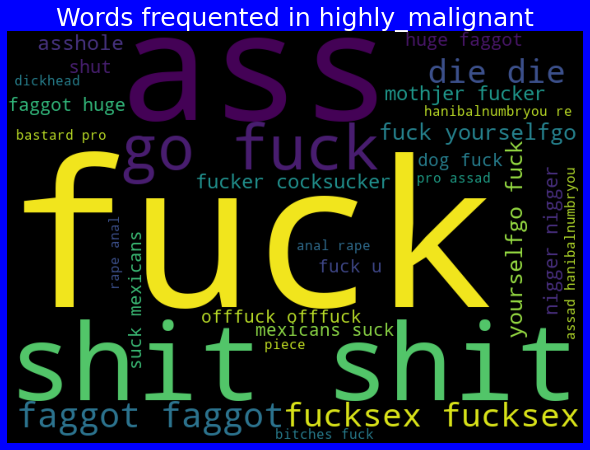

In [134]:
# Getting sense of loud words in highly malignant

# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
highly_malignants = train['comment_text'][train['highly_malignant']==1]

high_malignant_cloud = WordCloud(width=700,height=500,background_color='black',
                                 max_words=30).generate(' '.join(highly_malignants))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(high_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in highly_malignant",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

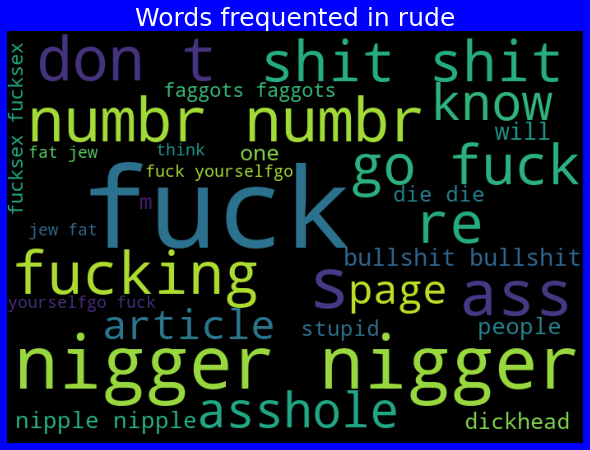

In [135]:
# Getting sense of loud words in rude
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
rude_text = train['comment_text'][train['rude']==1]

rude_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(rude_text))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in rude",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

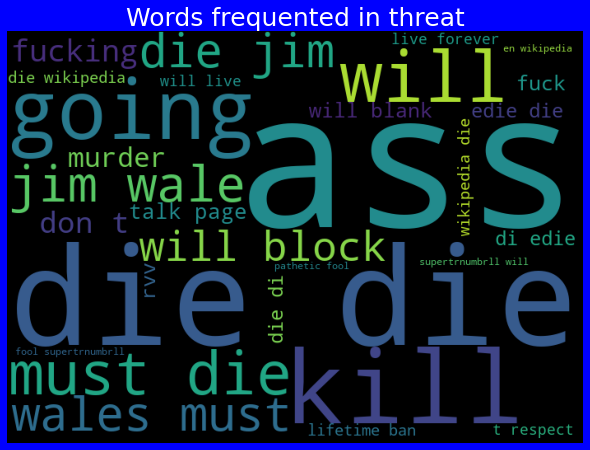

In [136]:
# Getting sense of loud words in threat
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
threats = train['comment_text'][train['threat']==1]

threat_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(threats))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in threat",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

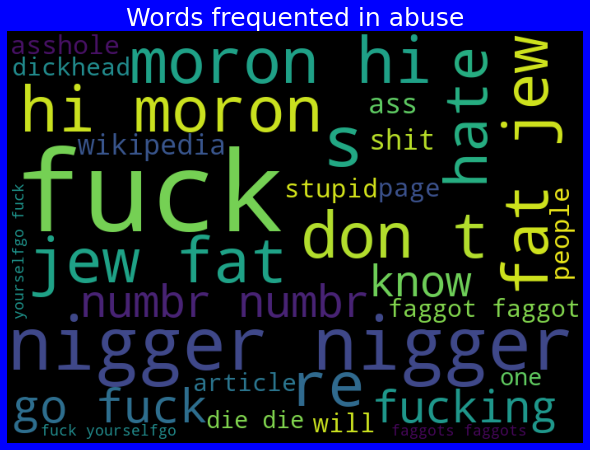

In [137]:
# Getting sense of loud words in abuse
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
abuse_text = train['comment_text'][train['abuse']==1]

abuse_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(abuse_text))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(abuse_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in abuse",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

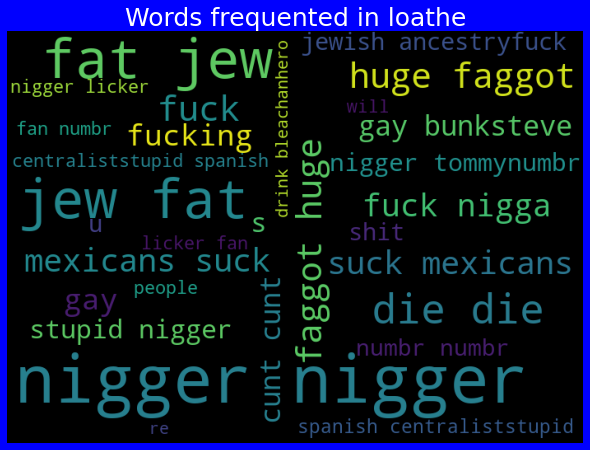

In [138]:
# Getting sense of loud words in loathe
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
loathe_text = train['comment_text'][train['loathe']==1]

loathe_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(loathe_text))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(loathe_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in loathe",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

observations 

From the above plots we can clearly see the toxic words which are indication of malignant, highly malignant, rude, threat, abuse and loathe words.
Here most frequent words used for each label is displayed in the word cloud based on different label and also when all the values are present.

In [139]:
# Checking the correlation between features and the target
cor = train.corr()
cor

,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.967748,-0.054413,-0.055820
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.298666,0.010175,0.008215
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.702812,-0.042910,-0.043581
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.162925,-0.007917,-0.009327
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.677324,-0.045027,-0.045614
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.280144,-0.013628,-0.013340
label,0.967748,0.298666,0.702812,0.162925,0.677324,0.280144,1.000000,-0.051643,-0.052997
comment_length,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,-0.051643,1.000000,0.998343
clean_length,-0.055820,0.008215,-0.043581,-0.009327,-0.045614,-0.013340,-0.052997,0.998343,1.000000


<AxesSubplot:>

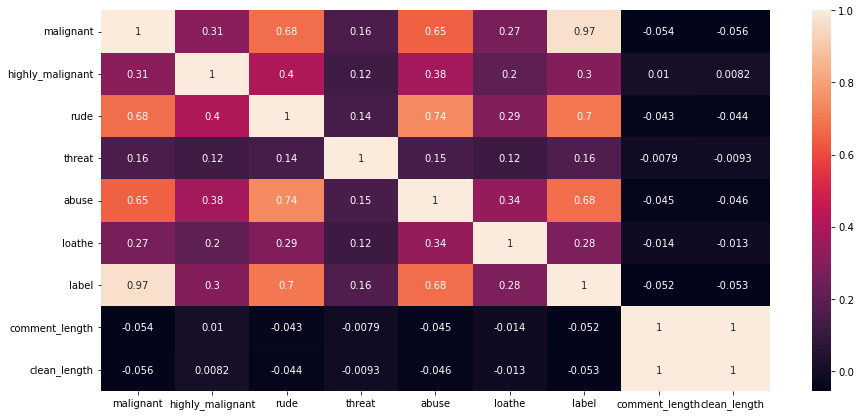

In [140]:
#now lets find out the co relation using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True)

This heatmap shows the correlation matrix of the data. We can observe the relation between one feature to other and relation between features and label.

From the heat map we can observe the features have some strong relation with each other. We can also observe multicollinearity problem.

I have successfully completed cleaning data. Let's use TF-IDF vactorizer, it'll help to transform the text data to feature vector which can be used as input in our modelling. It is a common algorithm to transform text into numbers. It measures the originality of a word by comparing the frequency of appearance of a word in a document with the number of documents the words appear in.

# Separating features and label into X and y

# Converting tokens into vectors for moving forward to build machine learning model.

In [144]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features=15000,stop_words='english')

In [145]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(train['comment_text'])

y = train['label']

# Checking shape of X and y
X.shape


(159571, 15000)

In [146]:
y.shape

(159571,)

In [147]:
# Doing the same process for test data 
x = tf_vec.fit_transform(test['comment_text'])
x.shape

(153164, 15000)

# Model Building

In [150]:
# Splitting training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [151]:
print("x_train.shape()")

x_train.shape()


In [152]:
print("y_train.shape()")

y_train.shape()


In [153]:
print("x_test.shape()")

x_test.shape()


In [154]:
print("y_test.shape()")

y_test.shape()


# Balancing data using oversampling technique

In [167]:
# Importing the Oversampling library and Counter
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [168]:
# We are trying to increase the points of minimum label data
OS = RandomOverSampler(0.75)
train_x,train_y = OS.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(train_y)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 100342, 1: 75256})


I am using RandomOverSampler method to ensure that all the categories present in our label data have the same value. After applying oversampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [169]:
# Creating instances for different Classifiers

LR = LogisticRegression()
MNB = MultinomialNB()
lgbm = LGBMClassifier()
SVC = LinearSVC()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier()
xgb = XGBClassifier(verbosity=0)

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB',MNB))
models.append(('LGBMClassifier',lgbm))
models.append(('LinearSVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('AdaBoostClassifier',ABC))
models.append(('XGBClassifier',xgb))

In [170]:
# Creating empty lists
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
lg_loss=[]
Hamming_loss=[]

for name,model in models:
    print("**********",name,"**********")
    print("\n")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    y_pred=model.predict(x_test)
# Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score*100)
# Model Score
    score=model.score(train_x,train_y)
    print('Learning Score : ',score)
    Score.append(score*100)
# Cross Validation Score
    cv=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score: ',cv)
    cvs.append(cv*100)
# Auc Roc Score
    roc_auc= roc_auc_score(y_test,y_pred)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
# Log Loss
    loss = log_loss(y_test,y_pred)
    print('Log loss : ', loss)
    lg_loss.append(loss) 
# Hamming loss
    ham_loss = hamming_loss(y_test,y_pred)
    print("Hamming loss: ", ham_loss)
    Hamming_loss.append(ham_loss)
    print('\n')
# Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
# Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))
    print("******************************************************************************")
    print('\n\n')

********** LogisticRegression **********


LogisticRegression()
Accuracy_Score:  0.9454169451871658
Learning Score :  0.9525791865510996
Cross Validation Score:  0.9558441024494281
roc_auc_score:  0.8939276692611652
Log loss :  1.8852616895580347
Hamming loss:  0.05458305481283422


Confusion matrix: 

[[41222  1782]
 [  831  4037]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     43004
           1       0.69      0.83      0.76      4868

    accuracy                           0.95     47872
   macro avg       0.84      0.89      0.86     47872
weighted avg       0.95      0.95      0.95     47872

******************************************************************************



********** MultinomialNB **********


MultinomialNB()
Accuracy_Score:  0.9109918114973262
Learning Score :  0.9134215651658902
Cross Validation Score:  0.946982848930392
roc_auc_score:  0.8867898493629645
Log loss :  3.0742934154

# Plotting ROC and compare AUC for all the models used

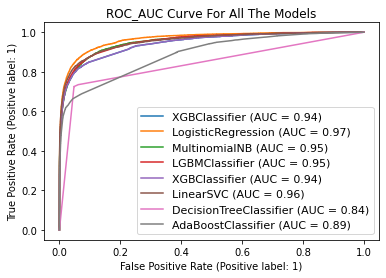

In [171]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(xgb,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(MNB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lgbm, x_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plt.title("ROC_AUC Curve For All The Models")
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Model selection

In [172]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Validation Score':cvs,
                     'Auc_Roc_Score':rocscore,'Log_Loss':lg_loss,'Hamming_loss':Hamming_loss}) 
Results

,Model,Learning Score,Accuracy Score,Cross Validation Score,Auc_Roc_Score,Log_Loss,Hamming_loss
0,LogisticRegression,95.257919,94.541695,95.584410,89.392767,1.885262,0.054583
1,MultinomialNB,91.342157,91.099181,94.698285,88.678985,3.074293,0.089008
2,LGBMClassifier,90.518115,94.729696,95.540543,86.482503,1.820321,0.052703
3,LinearSVC,97.295527,93.967246,95.954778,88.590280,2.083673,0.060328
4,DecisionTreeClassifier,99.839975,92.872660,94.190047,83.864003,2.461731,0.071273
5,AdaBoostClassifier,83.612000,92.718082,94.569816,80.936120,2.515116,0.072819
6,XGBClassifier,90.736797,94.934408,95.325592,85.239283,1.749612,0.050656


After creating and training different classification algorithms, we can see that the difference between accuracy and cross validation score is less for "Extreme Gradient Boosting Classifier (XGBClassifier)" and Gradient Boosting Classifier. But, XGBClassifier giving less loss values, auc roc score and high accuracy score compared to Gradient Boosting Classifier. On this basis I can conclude that "XGBClassifier" as the best fitting model. Now, we will try Hyperparameter Tuning to find out the best parameters and using them to improve the scores and metrics values.

# Hyper Parameter Tuning

In [ ]:
# Let's Use the GridSearchCV to find the best paarameters in XGBClassifier

# Extreme XGBClassifier
parameters = {
              'booster':['gbtree'],
              'max_depth':[2,6],
              'eta':[0,0.2,0.3],
              'colsample_bytree':[1,0.8]}

# Running GridSearchCV for the model Bagging Regressor.
GCV=GridSearchCV(XGBClassifier(),parameters,cv=5,scoring='accuracy')

In [ ]:
# Training the best model
GCV.fit(train_x,train_y)

In [ ]:
#Getting best parameters
GCV.best_params_

In [188]:
# Creating final model 
comment_model = XGBClassifier(max_depth=6, eta=0.3, colsample_bytree=1, booster='gbtree')
comment_model.fit(train_x, train_y)
pred = comment_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score:", acc_score*100)
roc_auc = roc_auc_score(y_test,y_pred)
print('roc_auc_score: ',roc_auc*100)
print('Log loss : ', log_loss(y_test,pred))
print("Hamming loss: ", hamming_loss(y_test,pred))
print("\n")
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:','\n',classification_report(y_test,pred))

Accuracy score: 94.9344084224599
roc_auc_score:  85.23928274200019
Log loss :  1.7496119549882116
Hamming loss:  0.05065591577540107


Confusion Matrix: 
 [[41890  1114]
 [ 1311  3557]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     43004
           1       0.76      0.73      0.75      4868

    accuracy                           0.95     47872
   macro avg       0.87      0.85      0.86     47872
weighted avg       0.95      0.95      0.95     47872



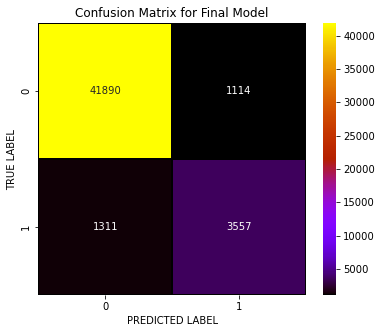

In [189]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",
            xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Final Model')
plt.show()

# Plotting ROC and Compare AUC for the Final model

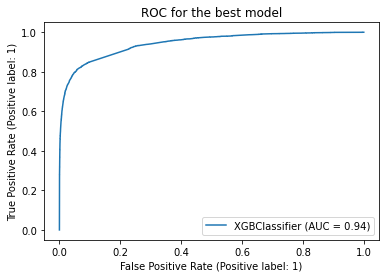

In [190]:

plot_roc_curve(comment_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

In [191]:
# Saving the model using .pkl
import joblib
joblib.dump(comment_model,"Malignant_Comments_Classification.pkl")

['Malignant_Comments_Classification.pkl']

In [192]:
# Predicting the trained final model
comment_model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [193]:

# loading the final model
model = joblib.load('Malignant_Comments_Classification.pkl')

In [194]:
# Lets load the test data set
test

,comment_text,comment_length,clean_length
0,yo bitch ja rule is more succesful then you ll...,367,358
1,from rfc the title is fine as it is imo,50,39
2,sources zawe ashton on lapland,54,30
3,if you have a look back at the source the info...,205,200
4,i don t anonymously edit articles at all,41,40
...,...,...,...
153159,i totally agree this stuff is nothing but too ...,60,55
153160,throw from out field to home plate does it get...,198,182
153161,okinotorishima categories i see your changes a...,423,365
153162,one of the founding nations of the eu germany ...,502,460


In [195]:
# Predicting the values for test data after loading trained model
Predictions = model.predict(x)
Predictions

array([0, 0, 0, ..., 0, 0, 0])

In [196]:
# Adding the predicted values to test dataframe
test['Predicted_Values']=Predictions
test

,comment_text,comment_length,clean_length,Predicted_Values
0,yo bitch ja rule is more succesful then you ll...,367,358,0
1,from rfc the title is fine as it is imo,50,39,0
2,sources zawe ashton on lapland,54,30,0
3,if you have a look back at the source the info...,205,200,0
4,i don t anonymously edit articles at all,41,40,0
...,...,...,...,...
153159,i totally agree this stuff is nothing but too ...,60,55,0
153160,throw from out field to home plate does it get...,198,182,0
153161,okinotorishima categories i see your changes a...,423,365,0
153162,one of the founding nations of the eu germany ...,502,460,0


In [197]:
# Checking values counts for predicted values
test.Predicted_Values.value_counts()

0    133305
1     19859
Name: Predicted_Values, dtype: int64

In [199]:
# Saving the data into csv file
test.to_csv("MalignantCommentsPredictedTestData1.csv",index=False)

# Conclusions


This case study gives an idea of NLP text processing in machine learning. In this case study, apart from applying the techniques that we have learnt in the EDA module, we also classified hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

From this dataset we were able to understand the idea of Natural Language Processing using machine learning models. This model helps us to understand whether the online comments are malignat or non malignant.
First we loaded the dataset and have done data cleaning, EDA and text pre-processing techniques like

-Feature engineering
-Removing Punctuations and other special characters
-Splitting the comments into individual words
-Removing Stop Words
-Stemming and Lemmatising
-Checking correlation and scaling and got better insights from the data visualizations.

Then we did the model training, building the model and finding out the best model on the basis of different metrices like Accuracy Score, Cross Validation Score, roc_auc_score, precision, recall, f1score, log loss and hamming loss. We have created 8 different models. A Result table is made which is comprises of accuracy,cross validation score,auc roc score,learning scores, log loss and hamming loss of each model. Plotted AUC ROC curve for all the models combiningly.

We got XGBClassifier as the best model among all the models as it was giving least difference of accuracy and cv score, and loss also very less compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The accuracy score increased after tuning. So we concluded that XGBClassifier as the best algorithm as it was giving high accuracy and AUC after tuning.

After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values for test data. Further we saved the predicted values test data into csv file.
Finally, we achieved our goal by building a prototype of online hate and abuse comment classifier.